# Importing Libraries

In [84]:
import pandas as pd
import numpy as np # For scientific computations
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


# Importing Data set- Titanic Data

In [85]:
df = pd.read_csv('Titanic.csv', encoding='windows-1254')

# Data Analysis- Exploring Data

In [86]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<ipython-input-87-ca20d1c7aee9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df, palette=palette)


Text(0.5, 1.0, 'Survive Vs Did not Survive')

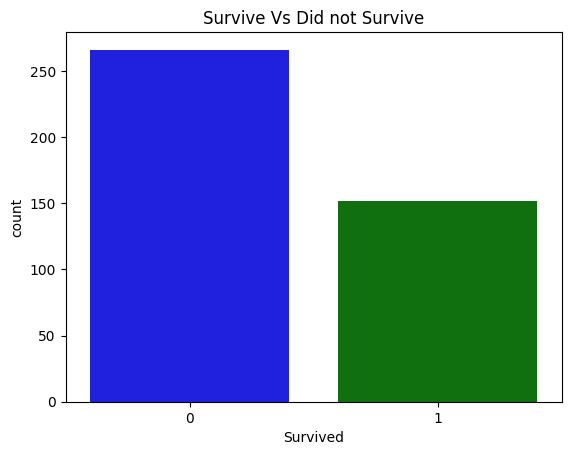

In [87]:
# Passengers that survived
palette = {'0': "blue", '1': "green"}
sns.countplot(x='Survived',data=df, palette=palette)
plt.title('Survive Vs Did not Survive')



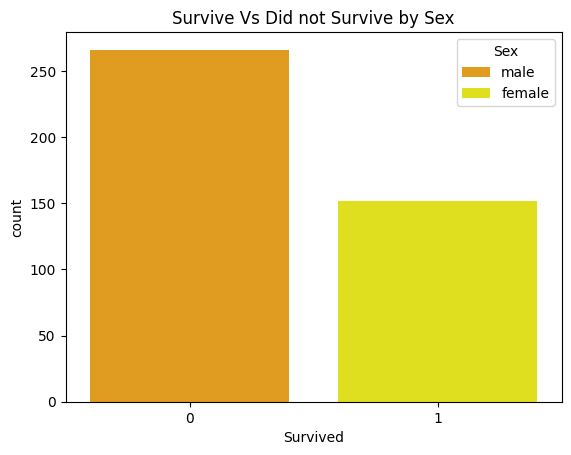

In [88]:
# Passengers that survived by sex
sns.set_palette(palette.values())
palette = {'0': "blue", '1': "green", 'male': "orange", 'female': "yellow"}
sns.countplot(x='Survived', palette= palette, data=df, hue='Sex')
plt.title('Survive Vs Did not Survive by Sex')

plt.show()



<Axes: ylabel='Frequency'>

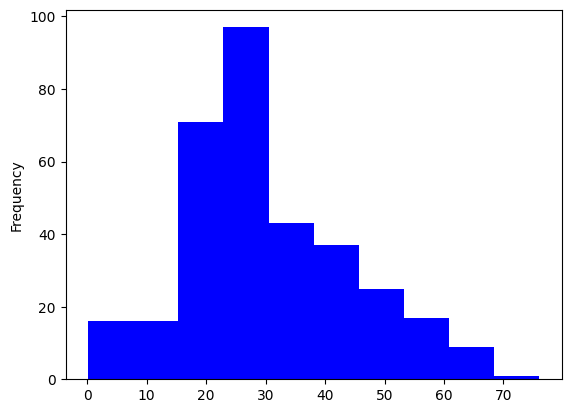

In [89]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

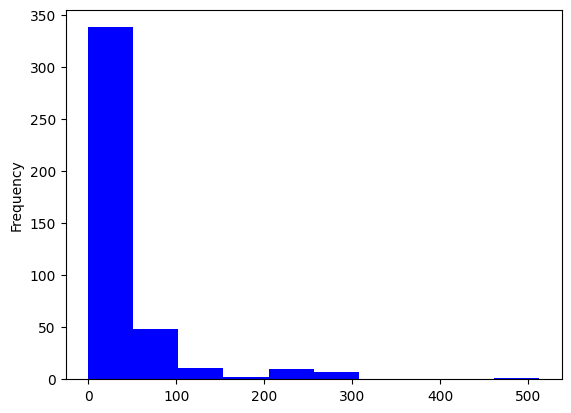

In [90]:
df['Fare'].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

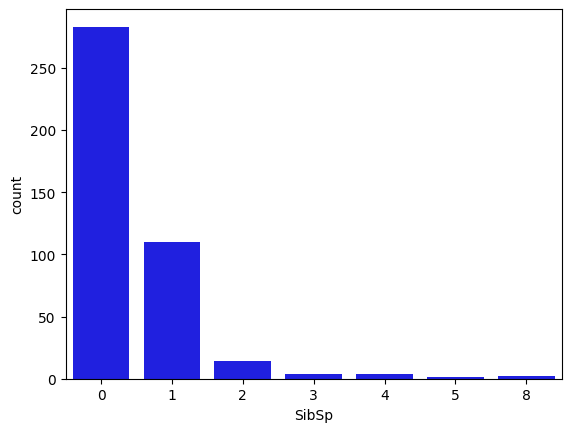

In [91]:
sns.countplot(x='SibSp',data=df)

# Data Wrangling - Cleaning Data

In [92]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

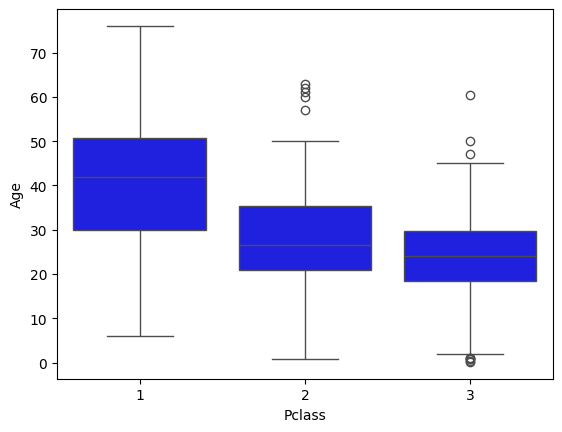

In [93]:
# Age distribution by Pclass
sns.boxplot(x= 'Pclass', y='Age', data = df)


In [94]:
df.drop('Cabin', axis=1, inplace= True)

In [95]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [96]:
# REMOVING ALL NULL VALUES

df.dropna(inplace = True)



In [97]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [98]:
# CONVERTING STRING VARIABLES - Logistic regression do not take string variables

# convert to dummies- colmns in str format, numerical one are ok for logistic reg
# drop_first - to drop one between items in a colmn- you only need one( if male is false it means its a female)

sex = pd.get_dummies(df['Sex'], drop_first=True)
sex.head(2)


,male
0,True
1,False


In [99]:
Embarked = pd.get_dummies(df['Embarked'], drop_first=True)
Embarked.head(2)

,Q,S
0,True,False
1,False,True


In [100]:
Pcl = pd.get_dummies(df['Pclass'], drop_first=True)
Pcl.head(2)

,2,3
0,False,True
1,False,True


***Concatenate(Join) the created dummies to the dataset***

In [101]:
df= pd.concat([df, sex, Pcl,Embarked], axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,True,False,True,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,False,False,True,False,True


**Dropping columns which we now have dummy colmns were created- Sex, Pclass and Embarked and others not useful**

In [ ]:
df.drop(['Sex', 'Pclass', 'Embarked', 'PassengerId', 'Name', 'Ticket'],axis=1, inplace=True)


In [105]:
df.head(2)

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,34.5,0,0,7.8292,True,False,True,True,False
1,1,47.0,1,0,7.0000,False,False,True,False,True


**# TRAIN & TEST DATA** - Predict whether passengers survives or not

**Train Data**

In [106]:
## Defining dependent and independent variables

x= df.drop('Survived', axis=1)

y=df['Survived']

In [108]:
from sklearn.model_selection import train_test_split

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [111]:
from sklearn.linear_model import LogisticRegression


In [122]:
logmodel = LogisticRegression()

In [120]:
x.columns = x.columns.astype(str)


In [121]:
logmodel.fit(x_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

# New Section